# Grand oral
## Question 1 : Quels sont les enjeux et méthodes de la génération de nombres pseudo-aléatoires ?

In [23]:
import random
import math
import matplotlib.pyplot as plt
import scipy.stats

## Middle-Square method / Méthode du carré médian
Méthode inventée par John Von Neumann et présentée à une conférence en 1949  
"Anyone who considers arithmetical methods of producing random digits is, of course, in a state of sin."

### Méthode pour générer une suite de nombres *de longueur $n$*
- Prendre un nombre de longeur $n$ comme valeur de départ.
- Retenir le carré de ce nombre
- Si sa longueur est inférieure à $2n$ ajouter des $0$ au début
- Les chiffres du milieu forment le nombre suivant de la suite

Exemple :
$$
u_0 = 1\ 567\\
u_0² = 02\ \underline{455\ 4}89\\
u_1 = 4\ 554\\
u_1² = 20\ \underline{738\ 9}16\\
u_2 = 7389

In [2]:
def generateur_von_neumann(graine: int) -> int:
    '''Génère un nombre aléatoire à partir d'un autre avec la méthode de John Von Neumann.
    Retourne les chiffres du milieu du carré
    Prévu pour des nombres à quatre chiffres
    '''
    longueur = len(str(graine))
    if longueur % 2: # Pour les nombres de longueur impaire on considère qu'il y a un zero avant
        longueur += 1
    carre: str = str(graine ** 2)
    carre = carre.zfill(longueur * 2) # On prend le carré en str et on rajoute des zéros au début pour avoir le double de la longueur de la graine
    milieu: str = carre[longueur//2:-longueur//2] # Les chiffres du milieu
    return int(milieu)

In [4]:
generateur_von_neumann(0)

0

In [5]:
graine = 540
print(graine, end=' ')
for _ in range(3):
    graine = generateur_von_neumann(graine)
    print(f'-> {graine}', end=' ')

540 -> 2916 -> 5030 -> 3009 

La période avec cet algorithme n'est pas très longue et très variable d'une graine à une autre. Par exemple 0 sera suivi de 0 indéfiniment.  
La période maximale est $8^n$ pour un nombre de longueur $n$.  
Une fois la période finie les valeurs se répètent.

In [8]:
def periode(algo, graine: int, afficher_valeurs: bool = False):
    '''Retourne la période avant que les valeurs ne se répètent pour une graine donnée.
    Si le paramètre afficher_valeurs est True toutes les valeurs seront affichées
    algo est une fonction qui prend un entier et en retourne un autre, c'est le générateur
    '''
    periode: int = 1
    valeurs: set = {graine}
    while True:
        suivant: int = algo(graine)
        if afficher_valeurs:
            print(suivant)
        if suivant in valeurs:
            return periode
        valeurs.add(suivant)
        graine = suivant
        periode += 1

In [10]:
periode_neumann = lambda graine, afficher_valeur = False : periode(generateur_von_neumann, graine, afficher_valeur)

In [8]:
periode_neumann(5761, True)

1891
5758
1545
3870
9769
4333
7748
315
992
9840
8256
1615
6082
9907
1486
2081
3305
9230
1929
7210
9841
8452
4363
357
1274
6230
8129
806
6496
1980
9204
7136
9224
821
6740
4276
2841
712
5069
6947
2608
8016
2562
5638
7870
9369
7781
5439
5827
9539
9925
5056
5631
7081
1405
9740
8676
2729
4474
166
275
756
5715
6612
7185
6242
9625
6406
368
1354
8333
4388
2545
4770
7529
6858
321
1030
609
3708
7492
1300
6900
6100
2100
4100
8100
6100


88

In [11]:
def periode_max_neumann(nb_chiffre: int) -> tuple:
    '''Retourne la graine qui a la plus longue période parmi tous les nombres à nb_chiffre chiffres ainsi que la période
    '''
    max_i = 10**(nb_chiffre - 1)
    max_per = periode_neumann(max_i)
    for i in range(10**(nb_chiffre-1) + 1, 10**nb_chiffre):
        per = periode_neumann(i)
        if per > max_per:
            max_per = per
            max_i = i
    return max_i, max_per

In [10]:
chiffres = 5
graine_max, per_max = periode_max_neumann(chiffres)
print(f'La période maximale pour un nombre à {chiffres} chiffres est {per_max} atteinte avec la graine {graine_max}')

KeyboardInterrupt: 

In [18]:
# Valeurs jamais atteinte pour des nombres à quatre chiffres
dico = {i:False for i in range(1000, 10000)}
for graine in range(1000, 10000):
    valeurs = {graine}
    while True:
        suivant = generateur_von_neumann(graine)
        dico[suivant] = True
        if suivant in valeurs:
            break
        valeurs.add(suivant)
        graine = suivant
print(len([cle for cle, val in dico.items() if not val]))

3675


Beaucoup de graines atteignent cette boucle 4100 -> 6100 -> 2100 -> 4100 et d'autres convergent vers 0

In [19]:
# Toutes les valeurs à quatre chiffres qui finissent la période en se répétant et ne sont pas 0 ni la boucle précédante
i = 0 
distinct = set()
for graine in range(1000, 10000):
    valeurs = {graine}
    while True:
        suivant = generateur_von_neumann(graine)
        if suivant == 4100:
            i += 1
        if suivant in valeurs:
            if suivant not in {4100, 6100, 2100, 0}:
                distinct.add(suivant)
            break
        valeurs.add(suivant)
        graine = suivant
print(distinct)

{9600, 5600, 1600, 3009, 100, 2916, 8100, 5030, 2500, 10, 3600, 7600, 50, 3792, 24, 60, 540}


In [13]:
generateur_von_neumann(100)

100

In [25]:
periode_neumann(5600, True)

3600
9600
1600
5600


4

In [26]:
periode_neumann(2916, True)

5030
3009
540
2916


4

In [27]:
periode_neumann(8100, True)

6100
2100
4100
8100


4

In [31]:
periode_neumann(3009, True)

540
2916
5030
3009


4

In [20]:
periode_neumann(7600, True)

7600


1

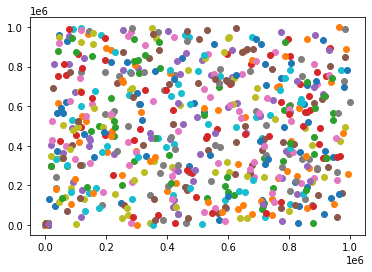

In [16]:
graines = [random.randrange(10_000, 100_000) for _ in range(15)]
periodes = [periode_neumann(i) for i in graines]
for graine, per in zip(graines, periodes):
    y = graine
    for _ in range(per // 2):
        x = generateur_von_neumann(y)
        y = generateur_von_neumann(x)
        plt.scatter(x, y)
plt.show()

In [24]:
# test de fréquences
freq = [0 for _ in range(10)]
graine = 7894684364757834847383484864863183648361
per = periode_neumann(graine)
for _ in range(per):
    graine = generateur_von_neumann(graine)
    arrondi_entier = graine // (10**(len(str(graine)) -1))
    freq[arrondi_entier] += 1
print(freq, [freq[i]/sum(freq) for i in range(10)], sep='\n')

[0, 243, 227, 258, 246, 255, 227, 241, 254, 257]
[0.0, 0.11005434782608696, 0.10280797101449275, 0.11684782608695653, 0.11141304347826086, 0.11548913043478261, 0.10280797101449275, 0.10914855072463768, 0.11503623188405797, 0.11639492753623189]


In [26]:
# test du khi deux / chi square
graines = [random.randrange(10_000, 100_000) for _ in range(20)]
periodes = [periode_neumann(g) for g in graines]
valeurs = [0 for _ in range(9)]
for graine, per in zip(graines, periodes):
    for _ in range(per):
        graine = generateur_von_neumann(graine)
        arrondi_entier = graine // (10**(len(str(graine)) -1))
        valeurs[arrondi_entier-1] += 1

p = scipy.stats.chisquare(valeurs)[1]
print(p) # Le test est un succès si p<= 0.05

0.020682599893619518


## Générateur à congruence linéaire

Un générateur congruentiel linéaire est un générateur de nombres pseudo-aléatoires dont l'algorithme, introduit en 1948 par Derrick Lehmer, sous une forme réduite, pour produire des nombres aléatoires, est basé sur des congruences et une fonction affine. 

La suite utilise la formule
$$
u_{n+1} = (a\,u_n + c) \mod m
$$
- $a$ est le **multiplicateur**
- $c$ est l'**incrément**
- $m$ est le **module**

Le nombre produit sera toujours compris entre $0$ et $m-1$.
La suite est limitée à $m$ valeurs, elle est donc dite *ultimement périodique*

In [7]:
generateur_congruence = lambda x, a, c, m : (a*x + c) % m

In [3]:
x = 105
a = 87
c = 58
m = 256
for _ in range(20):
    a = generateur_congruence(a, 25, 16, 256)
    print(a)

143
7
191
183
239
103
31
23
79
199
127
119
175
39
223
215
15
135
63
55


## Choix des valeurs a, c, m
Si on sélectionne les valeurs aléatoirement elles ne seront pas très efficaces  
Exemple

In [5]:
a = 25
c = 16
m = 256
graines = (125, 96, 50, 10)
for graine in graines:
    vals = []
    x = graine
    for _ in range(20):
        vals.append(x)
        x = generateur_congruence(x, a, c, m)
    print(f'{graine} : {vals}')

125 : [125, 69, 205, 21, 29, 229, 109, 181, 189, 133, 13, 85, 93, 37, 173, 245, 253, 197, 77, 149]
96 : [96, 112, 0, 16, 160, 176, 64, 80, 224, 240, 128, 144, 32, 48, 192, 208, 96, 112, 0, 16]
50 : [50, 242, 178, 114, 50, 242, 178, 114, 50, 242, 178, 114, 50, 242, 178, 114, 50, 242, 178, 114]
10 : [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


Il faut donc choisir des valeurs de a, c et m maximisant le hasard

### Choix du module $m$
Prendre un module de la forme $2^k$ rend l'opération plus rapide car il n'y a pas besoin de faire la division euclidienne : l'ordinateur compte directement en binaire, mais ça a un inconvénient : 
Les bits de **poids faible** sont beaucoup moins aléatoires que ceux de poids fort et la période max est parfois assez faible  
On peut résoudre le premier problème en ne gardant que les bits de poids fort ou en utilisant un module de la forme $2^k \pm 1$, qui évite aussi la division.  

### Choix du multiplicateur $a$ et de l'incrément $c$

Il faut maximiser la période du générateur afin d'obtenir une période maximale de $m$.

#### Théorème (admis)
 $\forall c \neq 0$, la période du générateur est maximale **si et seulement si**  
 1. $pgcd(c, m) = 1$  
 2. Pour chaque nombre premier $p$ divisant $m$, $(a-1)$ est un multiple de $p$  
 3. $(a-1)$ est un multiple de 4 si $m$ en est un.

 Exemple : $a = ?$, $c = ?$, $m = 1025$

In [8]:
def premiers(plus_haut: int) -> list:
    '''Liste des nombres premiers jusqu'à plus_haut
    '''
    prems = [2]
    for i in range(3, plus_haut, 2):
        premier = True
        for j in prems:
            if not i%j:
                premier = False
                break
        if premier:
            prems.append(i)
    return prems

In [9]:
premiers(20)

[2, 3, 5, 7, 11, 13, 17, 19]

In [12]:
#trouvons des paramètres a et c maximisants pour m = 1025
m = 1025
premiers_divisants_m = [p for p in premiers(m) if not m%p]
print(premiers_divisants_m)

[5, 41]


$$
\begin{cases}
5 \equiv 0 \pmod {a-1}\\
41 \equiv 0 \pmod {a-1}
\end{cases}
$$

In [14]:
(41*5) + 1 # valeur possible de a

206

In [16]:
possibilites_c = [c for c in range(1, 1024) if math.gcd(1025, c) == 1]
print(possibilites_c) 

[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 81, 83, 84, 86, 87, 88, 89, 91, 92, 93, 94, 96, 97, 98, 99, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 124, 126, 127, 128, 129, 131, 132, 133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 151, 152, 153, 154, 156, 157, 158, 159, 161, 162, 163, 166, 167, 168, 169, 171, 172, 173, 174, 176, 177, 178, 179, 181, 182, 183, 184, 186, 187, 188, 189, 191, 192, 193, 194, 196, 197, 198, 199, 201, 202, 203, 204, 206, 207, 208, 209, 211, 212, 213, 214, 216, 217, 218, 219, 221, 222, 223, 224, 226, 227, 228, 229, 231, 232, 233, 234, 236, 237, 238, 239, 241, 242, 243, 244, 247, 248, 249, 251, 252, 253, 254, 256, 257, 258, 259, 261, 262, 263, 264, 266, 267, 268, 269, 271, 272, 273, 274, 276, 277, 

Des paramètres maximisant la période sont par exemple
\begin{cases}
a = 206\\
c = 69\\
m = 10245
\end{cases}

In [22]:
exemple_congruentiel_max = lambda x : (206*x+69)%1025

In [26]:
periode(exemple_congruentiel_max, 487, True)

966
215
284
148
832
286
560
629
493
152
631
905
974
838
497
976
225
294
158
842
296
570
639
503
162
641
915
984
848
507
986
235
304
168
852
306
580
649
513
172
651
925
994
858
517
996
245
314
178
862
316
590
659
523
182
661
935
1004
868
527
1006
255
324
188
872
326
600
669
533
192
671
945
1014
878
537
1016
265
334
198
882
336
610
679
543
202
681
955
1024
888
547
1
275
344
208
892
346
620
689
553
212
691
965
9
898
557
11
285
354
218
902
356
630
699
563
222
701
975
19
908
567
21
295
364
228
912
366
640
709
573
232
711
985
29
918
577
31
305
374
238
922
376
650
719
583
242
721
995
39
928
587
41
315
384
248
932
386
660
729
593
252
731
1005
49
938
597
51
325
394
258
942
396
670
739
603
262
741
1015
59
948
607
61
335
404
268
952
406
680
749
613
272
751
0
69
958
617
71
345
414
278
962
416
690
759
623
282
761
10
79
968
627
81
355
424
288
972
426
700
769
633
292
771
20
89
978
637
91
365
434
298
982
436
710
779
643
302
781
30
99
988
647
101
375
444
308
992
446
720
789
653
312
791
40
109
998
657
1

1025

### Exemple de générateurs congruentiels linéaires 
#### RANDU
*Randu* est un générateur congruentiel linéaire utilisant les paramètres  
\begin{cases}
a = 65539\\
c = 0\\
m = 2^{31}\\
X_O \equiv 1 \pmod 2
\end{cases}
Il a été introduit dans les années 60 sur des machines *IBM System 370*.  
Ce générateur est très impopulaire et réputé pour être fortement biaisé. En effet
$$m² \equiv 6m - 9 \pmod{2^{31}}$$
Ce qui signifie que 
$$X_{x+2} \equiv 6X_{n+1} - 9X_n \pmod{2^{31}}$$
Or un bon générateur doit avoir des coefficients plus élevés que $6$ et $9$ afin qu'un changement de $X_n$ et $X_{n+1}$ même léger modifie complètement la valeur de $X_{n+2}$ 

In [1]:
RANDU = lambda x : (65539 * x) % 2**31

In [8]:
# Valeurs très similaires avec des graines proches
x1 = 13.2
x2 = 13.9
for _ in range(20):
    print(f'{x1:,.2f} | {x2:,.2f}')
    x1 = RANDU(x1)
    x2 = RANDU(x2)

13.20 | 13.90
865,114.80 | 910,992.10
864,184,029.20 | 1,723,452,745.90
23,357,386.60 | 24,596,036.20
1,811,403,103.80 | 1,386,880,716.61
356,991,519.41 | 382,400,613.83
32,845,406.22 | 1,019,657,521.48
876,462,874.66 | 1,938,142,100.45
1,607,725,391.97 | 237,342,397.36
281,791,471.91 | 959,318,072.08
2,119,388,111.72 | 868,363,432.23
1,187,617,647.16 | 1,206,829,560.70
1,875,638,861.47 | 432,339,434.11
1,236,362,984.41 | 1,194,920,382.33
1,140,628,665.22 | 1,600,745,786.98
1,756,302,891.66 | 259,477,424.95
1,211,683,458.97 | 2,115,429,138.86
724,397,960.91 | 1,566,016,824.58
1,896,953,498.72 | 490,677,161.73
164,518,864.16 | 2,070,357,757.20


## Méthode de Fibonnaci
Ce générateur fonctionne de la même façon que la suite de Fibonnaci, c'est à dire que les deux derniers termes sont additionnés, modulo valeur max désirée
$$X_{n+2} = X_{n+1} + X_n \pmod m$$
Avec deux graines $X_0$ et $X_1$, et $m$ la valeur maximale désirée  
L'efficacité du générateur dépend fortement de $m$ et des deux graines, cependant il est simple à implémenter et ne consomme que peu de ressources

In [9]:
generateur_fibo = lambda x1, x2, m : (x1 + x2) % m

In [12]:
x1 = 13
x2 = 57
m = 256
for _ in range(20):
    x1, x2 = x2, generateur_fibo(x1, x2, m)
    print(x2)

70
127
197
68
9
77
86
163
249
156
149
49
198
247
189
180
113
37
150
187
